In [40]:
# pandasをインポートする
import pandas as pd

In [41]:
# 売上データを読み込む
sales_data = pd.read_csv("uriage.csv")
sales_data.head()

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02:34,商品A,100.0,深井菜々美
1,2019-07-13 13:05:29,商 品 S,NaN,浅田賢二
2,2019-05-11 19:42:07,商 品 a,NaN,南部慶二
3,2019-02-12 23:40:45,商品Z,2600.0,麻生莉緒
4,2019-04-22 03:09:35,商品a,NaN,平田鉄二


# 整形前に中身を確認しておく

In [43]:
# ユニークな商品名を確認
pd.unique(sales_data["item_name"])

array(['商品A', '商 品 S', '商 品 a', '商品Z', '商品a', '商品S', '商品 a', '商品V', '商品O',
       '商 品U', '商品L', '商  品V', '商 品O', '商品C', '商品I', '商品r', '商品X', '商品 g',
       '商品R', '商品P', '商品Q', '商品y', '商品 A', '商品N', '商品W', '商 品E', '商品K',
       '商品B', '商品F', '商 品s', '  商品W', ' 商 品 n', '商 品F', '商品D', '商品M',
       '商品Y', '商品U', '商品H', '商品T', '商品J', '商  品O', '商品E', '商  品Q', ' 商品S',
       ' 商品M', '商  品T', '商品G', '商 品G', ' 商品P', ' 商品E', '商 品N', '商 品Y',
       '商品 J', '商品 V', '商品 K', '商 品V', '商 品D', '商 品A', '商品 F', '商品 H',
       '商 品K', '商 品T', '商品 X', '商品 Q', '商 品X', '商 品H', '商 品C', '商品 B',
       '商品 O', '商品 T', '商品v', '商品p', '商品i', '商品 w', '商 品 s', '商 品 q',
       '商品s', '商品l', '商品t', '商品k', '商品g', '商品o', '商品 R', '商品 S', '商 品M',
       '商品j', '商品d', '商品 I', '商品 E', '商品 o', '商品c', '商品 v', '商品e', '商品x',
       '商 品I', ' 商品W', ' 商品X', '商品 M', '商 品P'], dtype=object)

In [44]:
# 商品の個数を確認しておく
len(pd.unique(sales_data["item_name"]))

99

# 文字列の整形をする

In [45]:
# Before
sales_data.head()

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02:34,商品A,100.0,深井菜々美
1,2019-07-13 13:05:29,商 品 S,NaN,浅田賢二
2,2019-05-11 19:42:07,商 品 a,NaN,南部慶二
3,2019-02-12 23:40:45,商品Z,2600.0,麻生莉緒
4,2019-04-22 03:09:35,商品a,NaN,平田鉄二


In [46]:
# 大文字に揃える
sales_data["item_name"] = sales_data["item_name"].str.upper()
# 全角スペースを消す
sales_data["item_name"] = sales_data["item_name"].str.replace("　", "")
# 半角スペースを消す
sales_data["item_name"] = sales_data["item_name"].str.replace(" ", "")

# 商品名順に並び替え
sales_data.sort_values(by=["item_name"], ascending=True)

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02:34,商品A,100.0,深井菜々美
1748,2019-05-19 20:22:22,商品A,100.0,松川綾女
223,2019-06-25 08:13:20,商品A,100.0,板橋隆
1742,2019-06-13 16:03:17,商品A,100.0,小平陽子
1738,2019-02-10 00:28:43,商品A,100.0,松田浩正
...,...,...,...,...
2880,2019-04-22 00:36:52,商品Y,NaN,田辺光洋
2881,2019-04-30 14:21:09,商品Y,NaN,高原充則
1525,2019-01-24 10:27:23,商品Y,2500.0,五十嵐春樹
1361,2019-05-28 13:45:32,商品Y,2500.0,大崎ヒカル


In [47]:
# 個数を確認しておく
pd.unique(sales_data["item_name"])

array(['商品A', '商品S', '商品Z', '商品V', '商品O', '商品U', '商品L', '商品C', '商品I',
       '商品R', '商品X', '商品G', '商品P', '商品Q', '商品Y', '商品N', '商品W', '商品E',
       '商品K', '商品B', '商品F', '商品D', '商品M', '商品H', '商品T', '商品J'],
      dtype=object)

In [48]:
len(pd.unique(sales_data["item_name"]))

26

# 金額の欠損を直す

In [49]:
# 全データから確認する
sales_data.isnull()

,purchase_date,item_name,item_price,customer_name
0,False,False,False,False
1,False,False,True,False
2,False,False,True,False
3,False,False,False,False
4,False,False,True,False
...,...,...,...,...
2994,False,False,False,False
2995,False,False,False,False
2996,False,False,True,False
2997,False,False,True,False


In [50]:
# NULLが含まれる列を確認する
sales_data.isnull().any()

,0
purchase_date,False
item_name,False
item_price,True
customer_name,False


# 商品と金額のマスターを作る

In [51]:
# 必要な2列だけを抜き出す
item_master = sales_data[["item_name", "item_price"]]
item_master.sort_values(by=["item_name"], ascending=True)

,item_name,item_price
0,商品A,100.0
1748,商品A,100.0
223,商品A,100.0
1742,商品A,100.0
1738,商品A,100.0
...,...,...
2880,商品Y,NaN
2881,商品Y,NaN
1525,商品Y,2500.0
1361,商品Y,2500.0


In [52]:
# NaNでない行を優先的に残す
item_master = item_master.dropna(subset=['item_price']).drop_duplicates(subset=['item_name'], keep='first')
item_master.sort_values(by=["item_name"], ascending=True)

,item_name,item_price
0,商品A,100.0
42,商品B,200.0
15,商品C,300.0
56,商品D,400.0
36,商品E,500.0
43,商品F,600.0
21,商品G,700.0
65,商品H,800.0
17,商品I,900.0
74,商品J,1000.0


# sales_dataとitem_masterを結合する

In [53]:
merge_data = sales_data.merge(item_master, on='item_name', how='inner')
merge_data = merge_data[['purchase_date', 'item_name', 'item_price_y', 'customer_name']]
merge_data.head()

,purchase_date,item_name,item_price_y,customer_name
0,2019-06-13 18:02:34,商品A,100.0,深井菜々美
1,2019-07-13 13:05:29,商品S,1900.0,浅田賢二
2,2019-05-11 19:42:07,商品A,100.0,南部慶二
3,2019-02-12 23:40:45,商品Z,2600.0,麻生莉緒
4,2019-04-22 03:09:35,商品A,100.0,平田鉄二


In [58]:
# 商品ごとに売り上げを集計する
merge_data.groupby('item_name')['item_price_y'].sum().head()

,item_price_y
item_name,
商品A,13900.0
商品B,22600.0
商品C,39900.0
商品D,50000.0
商品E,52500.0


# 日付の集計をしていく

In [62]:
# まずは日付型に変換する
merge_data['purchase_date'] = pd.to_datetime(merge_data['purchase_date'])
# month,date,year_monthの列を追加する
merge_data['month'] = merge_data['purchase_date'].dt.strftime('%m')
merge_data['date'] = merge_data['purchase_date'].dt.strftime('%d')
merge_data['year_month'] = merge_data['purchase_date'].dt.strftime('%Y%m')
merge_data.head()

,purchase_date,item_name,item_price_y,customer_name,month,date,year_month
0,2019-06-13 18:02:34,商品A,100.0,深井菜々美,06,13,201906
1,2019-07-13 13:05:29,商品S,1900.0,浅田賢二,07,13,201907
2,2019-05-11 19:42:07,商品A,100.0,南部慶二,05,11,201905
3,2019-02-12 23:40:45,商品Z,2600.0,麻生莉緒,02,12,201902
4,2019-04-22 03:09:35,商品A,100.0,平田鉄二,04,22,201904


<Axes: ylabel='item_name'>

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 21830 (\N{CJK UNIFIED IDEOGRAPH-5546}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 21697 (\N{CJK UNIFIED IDEOGRAPH-54C1}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21830 (\N{CJK UNIFIED IDEOGRAPH-5546}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21697 (\N{CJK UNIFIED IDEOGRAPH-54C1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


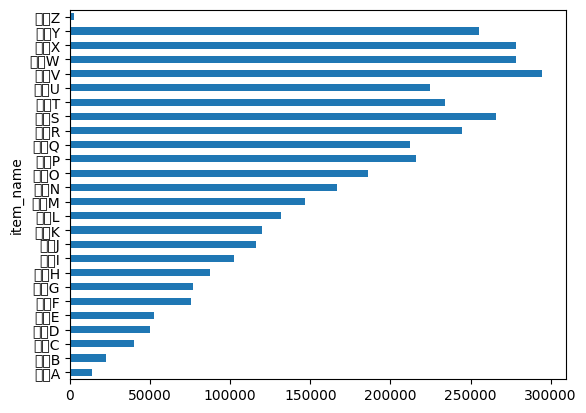

In [65]:
# 横棒グラフで可視化
merge_data.groupby('item_name')['item_price_y'].sum().plot(kind='barh')

<Axes: xlabel='year_month'>

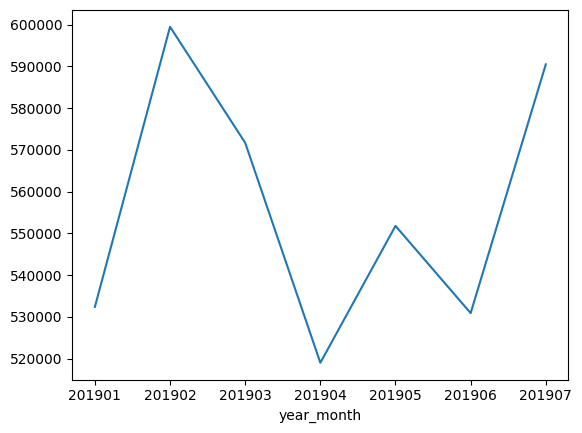

In [66]:
# 日付ごとの推移を確認
merge_data.groupby('year_month')['item_price_y'].sum().plot(kind='line')

# Excelのデータを確認する

In [55]:
customer_master = pd.read_excel("kokyaku_daicho.xlsx")
customer_master.head()

,顧客名,かな,地域,メールアドレス,登録日
0,須賀ひとみ,すが ひとみ,H市,suga_hitomi@example.com,2018/01/04
1,岡田 敏也,おかだ としや,E市,okada_toshiya@example.com,42782
2,芳賀 希,はが のぞみ,A市,haga_nozomi@example.com,2018/01/07
3,荻野 愛,おぎの あい,F市,ogino_ai@example.com,42872
4,栗田 憲一,くりた けんいち,E市,kurita_kenichi@example.com,43127
